<a href="https://colab.research.google.com/github/shreyas-sreedhar/HTML-JavaScript-Viewer-Time-based-Greetings-Emojis/blob/main/DSETM_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO6105 - ASSIGNMENT_1**

*` - Shreyas S Sreedhar 002874944`*

Dataset Link - https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020

<br/>
CSV - IPL Ball-by-Ball 2008-2020.csv
CSV 2 - IPL Matches 2008-2020.csv

MIT License

Copyright (c) 2024 Shreyas Sreedhar

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# AIM:

To Analyze the raw ball to ball collected by the enthusiastic IPL fans, and clean the data i.e. Imputing missing values, dealing with outliers etc. to build a predictive model that predicts the probablity of the winner


**Questions to be answered:**
* Q1.What are the data types? (Only numeric and categorical)

* Q2.Are there missing values?

* Q3.What are the likely distributions of the numeric variables?

* Q4.Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Q5.Which independent variables have missing data? How much?

* Q6.Do the training and test sets have the same data?

* Q7.In the predictor variables independent of all the other predictor variables?

* Q8.Which predictor variables are the most important?

* Q9.Do the ranges of the predictor variables make sense?

* Q10.What are the distributions of the predictor variables?   

In [ ]:
pip install eli5

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
ipl_data = pd.read_csv(
    "/content/drive/MyDrive/NEU-DSETM-ASSIGNMENT/Dataset/IPL Ball-by-Ball 2008-2020.csv"
    #https://github.com/shreyas-sreedhar/ipl-data-analysis/blob/df38984554ea7eabd03a2a3f7150edcb476c97c9/IPL%20Ball-by-Ball%202008-2020.csv
)
ipl_matches_data = pd.read_csv(
    "/content/drive/MyDrive/NEU-DSETM-ASSIGNMENT/Dataset/IPL Matches 2008-2020.csv"
    #https://github.com/shreyas-sreedhar/ipl-data-analysis/blob/df38984554ea7eabd03a2a3f7150edcb476c97c9/IPL%20Matches%202008-2020.csv
)

In [ ]:
# Viewing data in the file
ipl_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
# Viewing the matches data in the file
ipl_matches_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


### IPL Ball-by-Ball 2008-2020 Ball_by_Ball Dataset

The dataset contains detailed information about each ball bowled in IPL matches during the years 2008-2020.

#### Columns:

- **id**: Unique identifier for each match.
- **inning**: The inning number (1 or 2).
- **over**: The over number in the inning.
- **ball**: The ball number within the over.
- **batsman**: The name of the batsman on strike.
- **non_striker**: The name of the non-striker batsman.
- **bowler**: The name of the bowler.
- **batsman_runs**: The number of runs scored by the batsman off the ball.
- **extra_runs**: The number of extra runs conceded (like wides, no balls).
- **total_runs**: Total runs scored off the ball (batsman_runs + extra_runs).
- **non_boundary**: Indicator if the runs were scored without a boundary.
- **is_wicket**: Indicator if a wicket was taken on the ball.
- **dismissal_kind**: The type of dismissal, if applicable.
- **player_dismissed**: The name of the dismissed player, if applicable.
- **fielder**: The name of the fielder involved in the dismissal, if applicable.
- **extras_type**: The type of extra run conceded, if applicable.
- **batting_team**: The name of the batting team.
- **bowling_team**: The name of the bowling team.

Using this dataset for various data analysis and exploration tasks related to IPL matches till 2020


### IPL Matches 2008-2020 Matches Dataset

The dataset contains information about IPL matches played during the years 2008-2020.

#### Columns:

- **id**: Unique identifier for each match, same as in the ball-by-ball dataset.
- **city**: City where the match was played.
- **date**: Date of the match.
- **player_of_match**: Player who was awarded the 'Player of the Match'.
- **venue**: Venue where the match was played.
- **neutral_venue**: Indicator if the venue was neutral.
- **team1** and **team2**: Teams playing the match.
- **toss_winner**: Team that won the toss.
- **toss_decision**: Decision made by the toss winner to bat or field.
- **winner**: Winning team of the match.
- **result**: Type of result (e.g., runs, wickets).
- **result_margin**: Margin of the win.
- **eliminator**: Indicator if the match was an eliminator.
- **method**: Any special method applied (like D/L method).
- **umpire1** and **umpire2**: Names of the umpires.




In [216]:
data=ipl_data.merge(ipl_matches_data,on='id')
data

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


# Q1. What are the data types?

In [217]:
data_types = data.dtypes
print(data_types)

id                    int64
inning                int64
over                  int64
ball                  int64
batsman              object
non_striker          object
bowler               object
batsman_runs          int64
extra_runs            int64
total_runs            int64
non_boundary          int64
is_wicket             int64
dismissal_kind       object
player_dismissed     object
fielder              object
extras_type          object
batting_team         object
bowling_team         object
city                 object
date                 object
player_of_match      object
venue                object
neutral_venue         int64
team1                object
team2                object
toss_winner          object
toss_decision        object
winner               object
result               object
result_margin       float64
eliminator           object
method               object
umpire1              object
umpire2              object
dtype: object


In [218]:
import pprint

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

pp = pprint.PrettyPrinter(indent=4)
print("Numeric Columns:")
pp.pprint(numeric_columns)
print("\nCategorical Columns:")
pp.pprint(categorical_columns)


Numeric Columns:
[   'id',
    'inning',
    'over',
    'ball',
    'batsman_runs',
    'extra_runs',
    'total_runs',
    'non_boundary',
    'is_wicket',
    'neutral_venue',
    'result_margin']

Categorical Columns:
[   'batsman',
    'non_striker',
    'bowler',
    'dismissal_kind',
    'player_dismissed',
    'fielder',
    'extras_type',
    'batting_team',
    'bowling_team',
    'city',
    'date',
    'player_of_match',
    'venue',
    'team1',
    'team2',
    'toss_winner',
    'toss_decision',
    'winner',
    'result',
    'eliminator',
    'method',
    'umpire1',
    'umpire2']


# Q2. Are there any missing values?

In [219]:
# checking if the any data is missing
data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
city                  3139
date                     0
player_of_match        372
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 372
result                 372
result_margin         3597
eliminator             372
method              190260
umpire1                  0
umpire2                  0
dtype: int64

Columns like `dismissal_kind`, `player_dismissed`, `fielder`, `extras_type`, and `bowling_team` have missing values. The most significant number of missing values are in `dismissal_kind`, `player_dismissed`, and `fielder`. This is expected as not every ball results in a dismissal or involves a fielder.

In [220]:
# Filter to display rows where 'bowling_team' is missing
missing_bowling_team = data[data['bowling_team'].isnull()]
print(missing_bowling_team)

            id  inning  over  ball         batsman     non_striker  \
57048   501265       1     0     1         NV Ojha       DA Warner   
57049   501265       1     0     2       DA Warner         NV Ojha   
57050   501265       1     1     1       DA Warner         NV Ojha   
57051   501265       1     1     2         NV Ojha       DA Warner   
57052   501265       1     1     3         NV Ojha       DA Warner   
...        ...     ...   ...   ...             ...             ...   
115654  829763       1     7     3  AB de Villiers   Mandeep Singh   
115655  829763       1     8     6  AB de Villiers   Mandeep Singh   
115656  829763       1     9     1   Mandeep Singh  AB de Villiers   
115657  829763       1     8     4  AB de Villiers   Mandeep Singh   
115658  829763       1     8     5  AB de Villiers   Mandeep Singh   

             bowler  batsman_runs  extra_runs  total_runs  ...  \
57048     AC Thomas             1           0           1  ...   
57049     AC Thomas        

**Using the IPL Matches 2008-2020.csv to fill in the missing value**

Taking the `id`, `team1`, and `team2` columns from `ipl_matches_data` dataset, along with the inning information from ball-by-ball `ipl_data` dataset to solve for missing values of `bowling_team`


 *Logic* -

In the 1st inning of a cricket match, the bowling team is


-> The team that is not the `toss_winner` if `toss_decision` is 'bat'.


-> Else it's the `toss_winner`.

For the 2nd innings, it's the opposite.



In [221]:
# Merging the ball-by-ball data with the matches data on the 'id' column
merged_data = data

# Func to determine the bowling team
def get_bowling_team(row):
    if row['inning'] == 1:
        return row['team2'] if row['toss_winner'] == row['team1'] and row['toss_decision'] == 'bat' else row['team1']
    else:
        return row['team1'] if row['toss_winner'] == row['team2'] and row['toss_decision'] == 'bat' else row['team2']

# Using get_bolwing_team function to determine the bowling team of the ball_by_ball dataset.

merged_data['bowling_team'] = merged_data.apply(get_bowling_team, axis=1)

In [131]:
#displaying the heads
print(merged_data.head())

       id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  ...                  team2  \
0             1           0           1  ...  Kolkata Knight Riders   
1             1           0           1  ...  Kolkata Knight Riders   
2             0           0           0  ...  Kolkata Knight Riders   
3             1           0           1  ...  Kolkata Knight Riders   
4             1           0           1  ...  Kolkata Knight Riders   

                   toss_winner toss_decision                 winner result  \
0  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs

In [132]:
# Checking if any data is missing in the new merged dataset
new_dataset = merged_data.isnull().sum()
print(new_dataset)


id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team             0
city                  3139
date                     0
player_of_match        372
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 372
result                 372
result_margin         3597
eliminator             372
method              190260
umpire1                  0
umpire2                  0
dtype: int64


In [133]:
data.drop(['date', 'city','player_of_match','neutral_venue','toss_winner','toss_decision','method', 'umpire1', 'umpire2','batsman', 'non_striker', 'bowler',
        'batsman_runs','extra_runs','result', 'non_boundary','eliminator','result_margin','dismissal_kind', 'player_dismissed', 'fielder', 'extras_type'], axis='columns',inplace=True)

In [134]:
data.head()

,id,inning,over,ball,total_runs,is_wicket,batting_team,bowling_team,venue,team1,team2,winner
0,335982,1,6,5,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
1,335982,1,6,6,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
2,335982,1,7,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
3,335982,1,7,2,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
4,335982,1,7,3,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders


In [135]:
data1=data.groupby(['id','inning']).sum()['total_runs']
data1=data1.reset_index()
data1=data1[data1.inning==1]
data1

<ipython-input-135-9b5c7f284ba8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1=data.groupby(['id','inning']).sum()['total_runs']


,id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1620,1216547,1,201
1622,1237177,1,200
1624,1237178,1,131
1626,1237180,1,189


In [136]:
data1['Target']=data1['total_runs']+1
data1.drop(['total_runs'],axis='columns',inplace=True)
data1

,id,inning,Target
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111
...,...,...,...
1620,1216547,1,202
1622,1237177,1,201
1624,1237178,1,132
1626,1237180,1,190


In [215]:
data=data.merge(data1,on='id')
data

,id,over,ball,Run_on_this_ball,is_wicket,batting_team,bowling_team,venue,winner,Target_x,inning,Target_y
0,335982,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,1,223
1,335982,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,1,223
2,335982,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,1,223
3,335982,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,1,223
4,335982,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,1,223
...,...,...,...,...,...,...,...,...,...,...,...,...
93272,1237181,17,6,1,0,Mumbai Indians,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,157,1,157
93273,1237181,18,1,1,0,Mumbai Indians,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,157,1,157
93274,1237181,18,2,1,0,Mumbai Indians,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,157,1,157
93275,1237181,18,3,0,1,Mumbai Indians,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,157,1,157


In [139]:
data=data[(data.inning_x==2)]
data

,id,inning_x,over,ball,total_runs,is_wicket,batting_team,bowling_team,venue,team1,team2,winner,inning_y,Target
121,335982,2,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
122,335982,2,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
123,335982,2,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
124,335982,2,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
125,335982,2,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193372,1237181,2,17,6,1,0,Mumbai Indians,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,157
193373,1237181,2,18,1,1,0,Mumbai Indians,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,157
193374,1237181,2,18,2,1,0,Mumbai Indians,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,157
193375,1237181,2,18,3,0,1,Mumbai Indians,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,157


In [141]:
data = data.drop(['inning_x', 'inning_y', 'team1', 'team2'], axis='columns')
data.rename(columns={"total_runs": "Run_on_this_ball"}, inplace=True)


KeyError: "['inning_x', 'inning_y', 'team1', 'team2'] not found in axis"

In [142]:
new_dataset = data.isnull().sum()
print(new_dataset)

id                   0
over                 0
ball                 0
Run_on_this_ball     0
is_wicket            0
batting_team         0
bowling_team         0
venue                0
winner              27
Target               0
dtype: int64


In [143]:
print(data['winner'])

121       Kolkata Knight Riders
122       Kolkata Knight Riders
123       Kolkata Knight Riders
124       Kolkata Knight Riders
125       Kolkata Knight Riders
                  ...          
193372           Mumbai Indians
193373           Mumbai Indians
193374           Mumbai Indians
193375           Mumbai Indians
193376           Mumbai Indians
Name: winner, Length: 93277, dtype: object


In [144]:
data['winner'].fillna('Draw', inplace=True)


<ipython-input-144-804c470ab3f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['winner'].fillna('Draw', inplace=True)


In [145]:
data.batting_team=data.batting_team.str.replace('Delhi Daredevils','Delhi Capitals')
data.bowling_team=data.bowling_team.str.replace('Delhi Daredevils','Delhi Capitals')
data.batting_team=data.batting_team.str.replace('Deccan Chargers','Sunrisers Hyderabad')
data.bowling_team=data.bowling_team.str.replace('Deccan Chargers','Sunrisers Hyderabad')

<ipython-input-145-a297c5c32807>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.batting_team=data.batting_team.str.replace('Delhi Daredevils','Delhi Capitals')
<ipython-input-145-a297c5c32807>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.bowling_team=data.bowling_team.str.replace('Delhi Daredevils','Delhi Capitals')
<ipython-input-145-a297c5c32807>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [146]:
data.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [147]:
data.bowling_team.unique()

array(['Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Sunrisers Hyderabad',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Rising Pune Supergiant'], dtype=object)

In [148]:
teams=data.bowling_team.unique()
teams

array(['Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Sunrisers Hyderabad',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Rising Pune Supergiant'], dtype=object)

In [183]:
data.isna().sum()

id                  0
over                0
ball                0
Run_on_this_ball    0
is_wicket           0
batting_team        0
bowling_team        0
venue               0
winner              0
Target              0
dtype: int64

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93277 entries, 121 to 193376
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                93277 non-null  int64 
 1   over              93277 non-null  int64 
 2   ball              93277 non-null  int64 
 3   Run_on_this_ball  93277 non-null  int64 
 4   is_wicket         93277 non-null  int64 
 5   batting_team      93277 non-null  object
 6   bowling_team      93277 non-null  object
 7   venue             93277 non-null  object
 8   winner            93277 non-null  object
 9   Target            93277 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 7.8+ MB


We have now solved the cruicial missing datas.

# Q3. What are the likely distributions of the numeric variables?

In [184]:
new_dataset = data

In [185]:
new_dataset.describe()

,id,over,ball,Run_on_this_ball,is_wicket,Target
count,9.327700e+04,93277.000000,93277.000000,93277.000000,93277.000000,93277.000000
mean,7.568640e+05,8.903374,3.608703,1.294263,0.048854,164.884173
std,3.062104e+05,5.563623,1.806963,1.594195,0.215565,28.808130
min,3.359820e+05,0.000000,1.000000,0.000000,0.000000,63.000000
25%,5.012270e+05,4.000000,2.000000,0.000000,0.000000,147.000000
50%,7.292950e+05,9.000000,4.000000,1.000000,0.000000,165.000000
75%,1.082629e+06,14.000000,5.000000,1.000000,0.000000,184.000000
max,1.237181e+06,19.000000,9.000000,7.000000,1.000000,264.000000


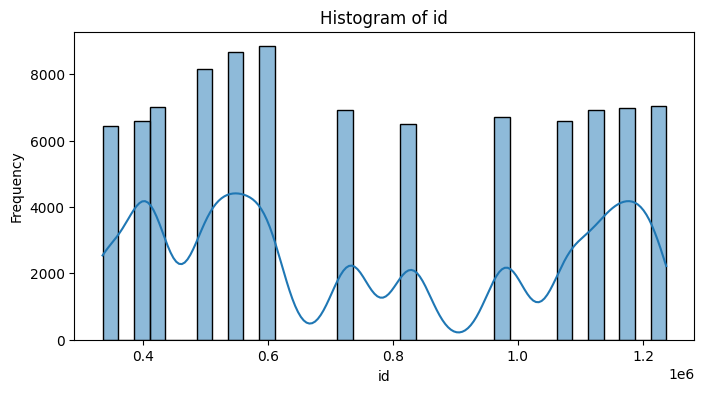

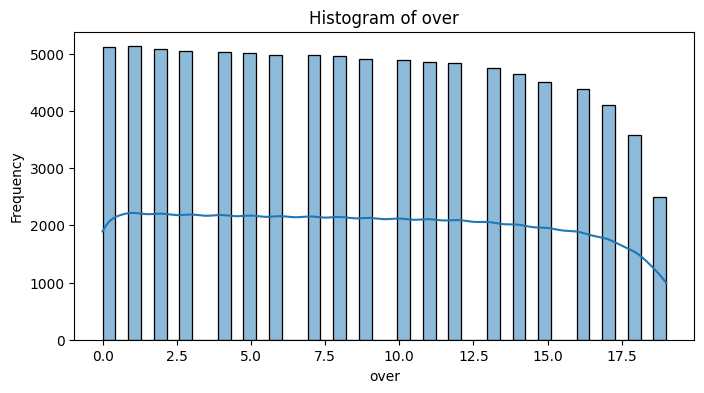

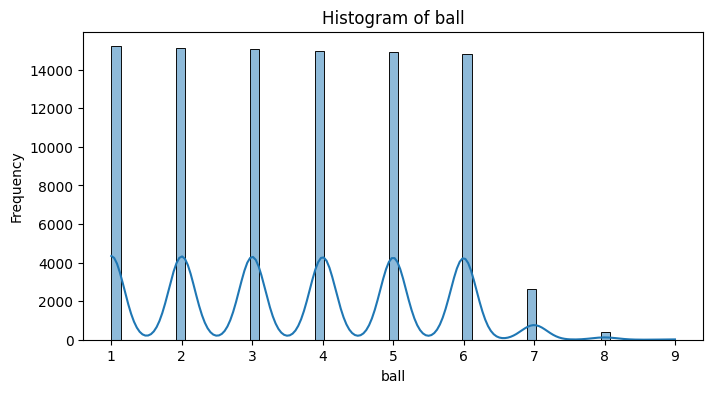

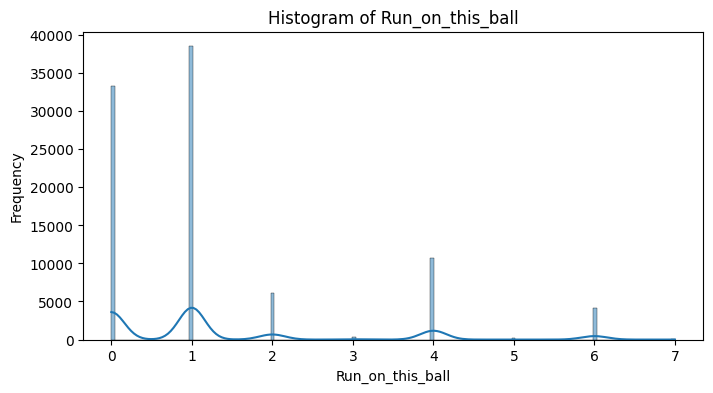

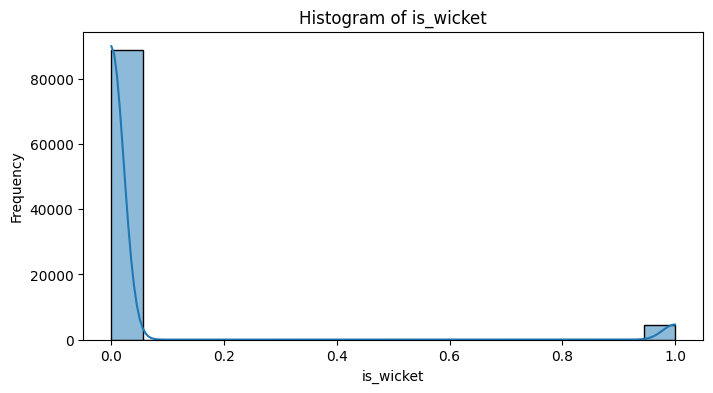

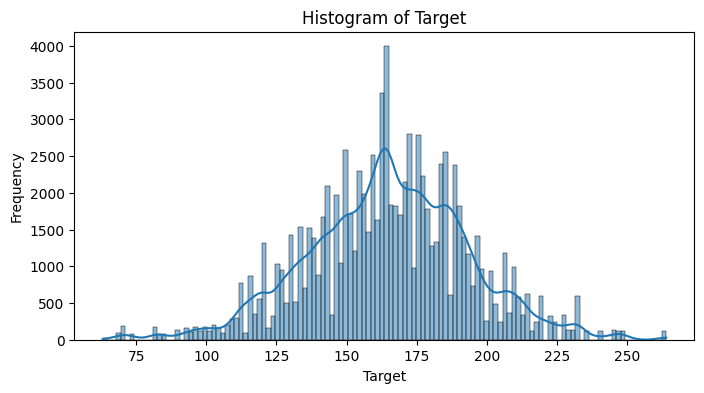

In [167]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plotting histograms for each numeric variable
for column in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

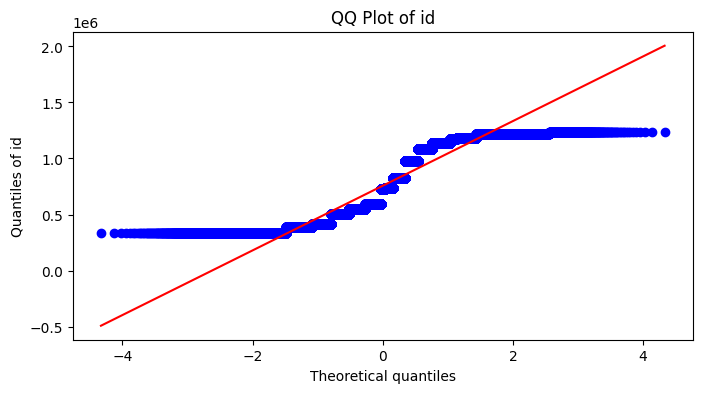

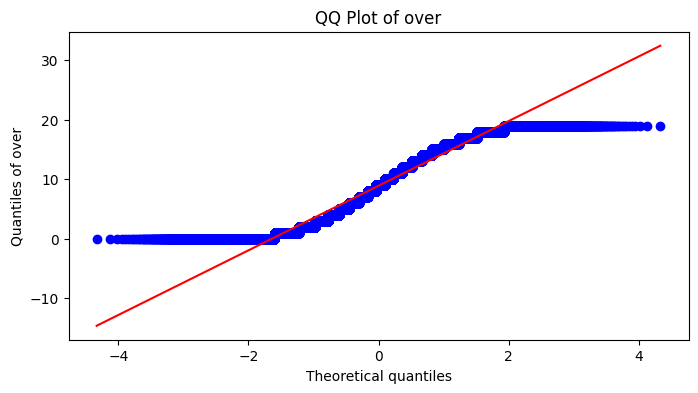

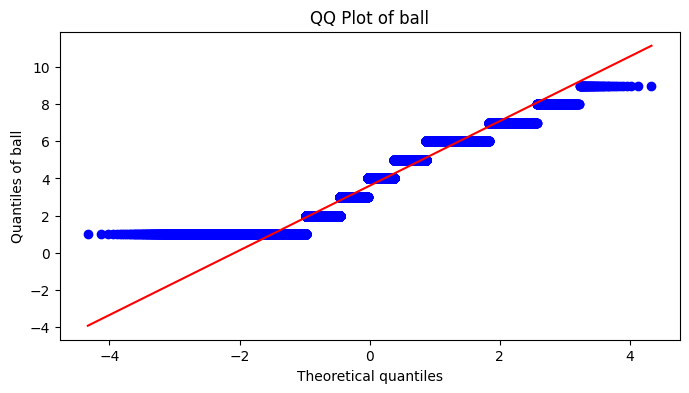

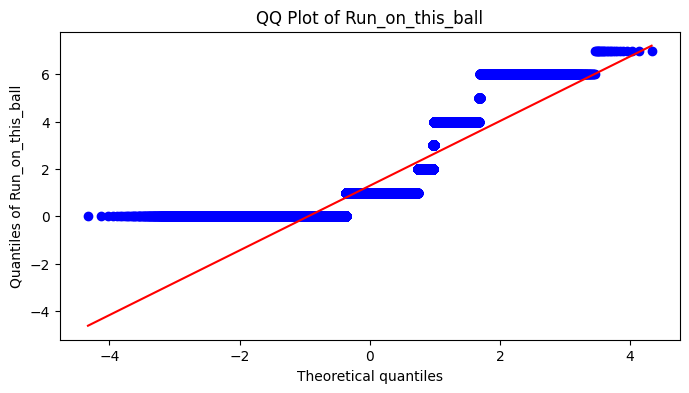

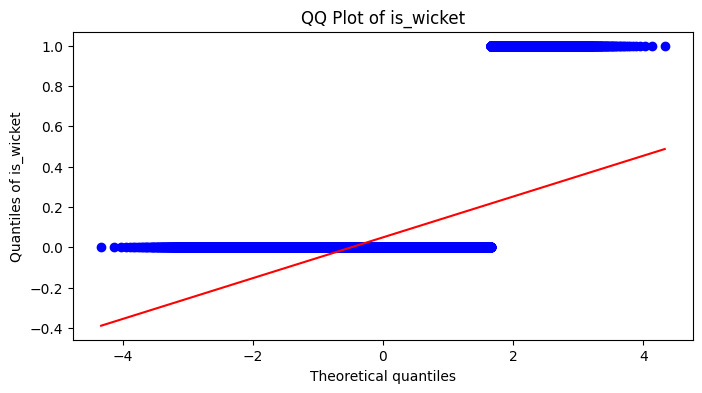

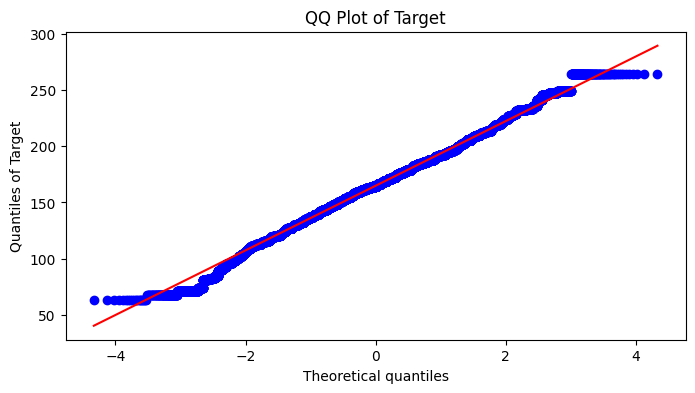

In [173]:
import scipy.stats as stats

numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plotting QQ plots for each numeric variable
for column in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    stats.probplot(numeric_data[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')
    plt.ylabel('Quantiles of ' + column)
    plt.show()

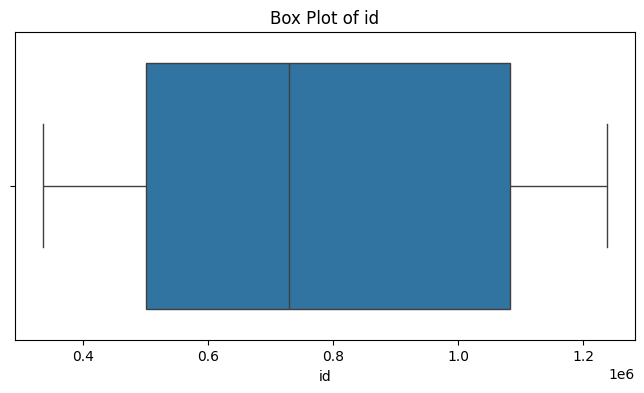

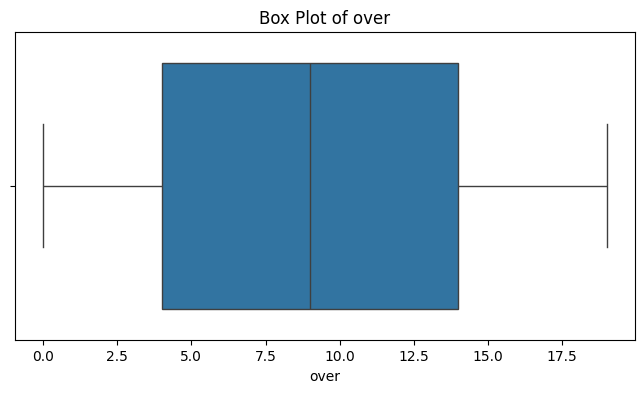

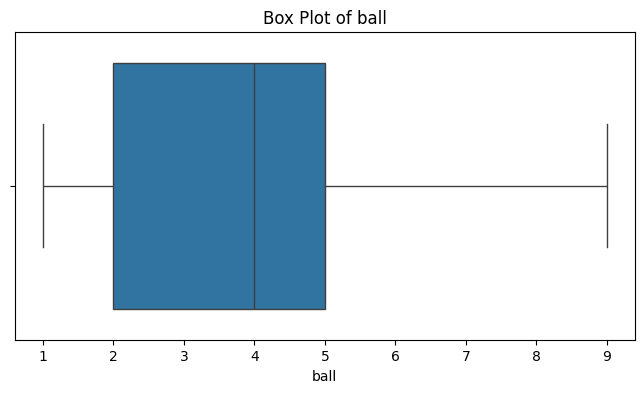

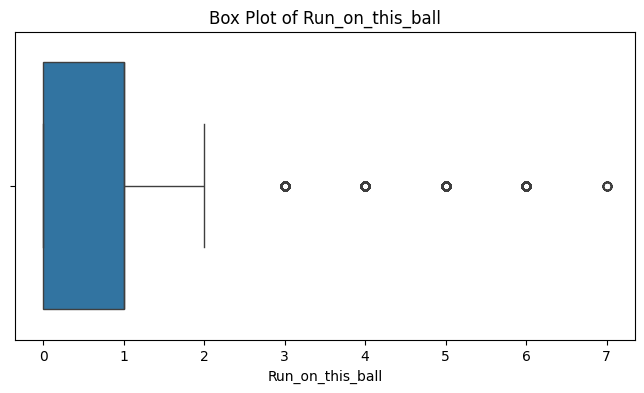

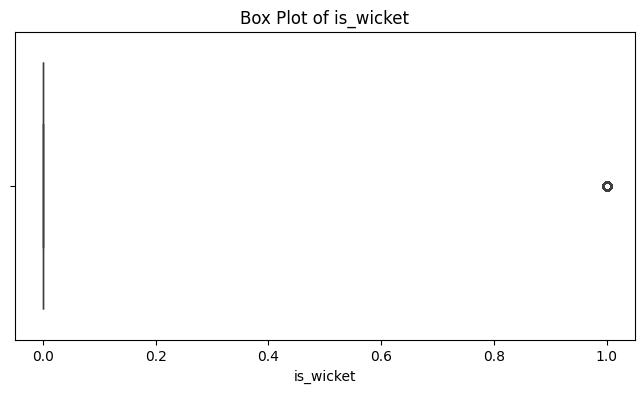

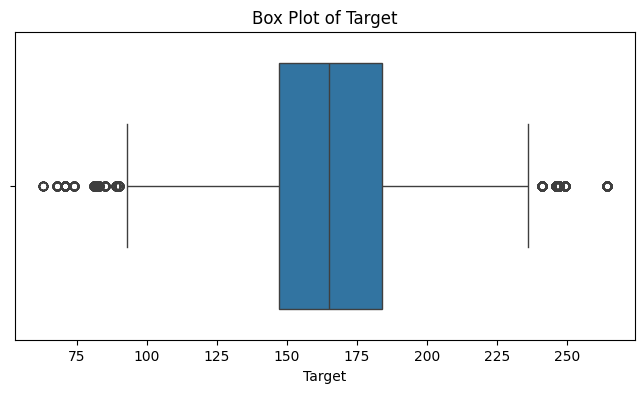

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plotting box plots for each numeric variable
for column in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=numeric_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


As we can see, the Histplots for this dataset's context wont make sense because Cricket has 6 balls per over
Id is just an identifier and not a numerical value of substance.

Hence, we focus on grouping the values to predict a target.

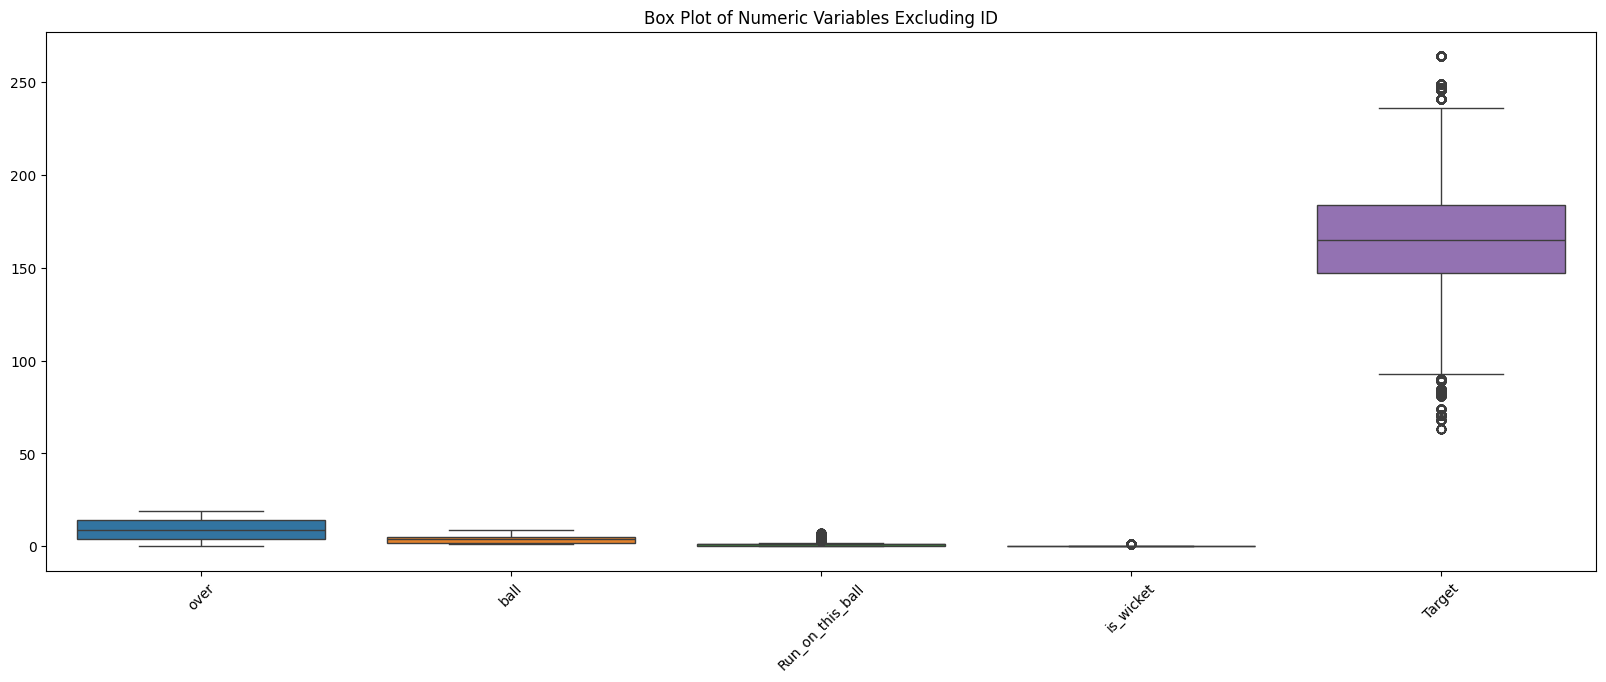

In [189]:
data_without_id = data.select_dtypes(include=['float64', 'int64']).drop('id', axis=1)

plt.figure(figsize=(20, 7))
sns.boxplot(data=data_without_id)
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability
plt.title('Box Plot of Numeric Variables Excluding ID')
plt.show()

# Q4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

To Predict Total Runs Scored I would need
- total_runs
- batsman_runs
- Over
- extra_runs
- ball
- inning
- id


Using Methods
1. Correlation Matrix
2. Random Forest Regressor
3. Univariate Feature selection

In [181]:
data.describe()

,id,over,ball,Run_on_this_ball,is_wicket,Target
count,9.327700e+04,93277.000000,93277.000000,93277.000000,93277.000000,93277.000000
mean,7.568640e+05,8.903374,3.608703,1.294263,0.048854,164.884173
std,3.062104e+05,5.563623,1.806963,1.594195,0.215565,28.808130
min,3.359820e+05,0.000000,1.000000,0.000000,0.000000,63.000000
25%,5.012270e+05,4.000000,2.000000,0.000000,0.000000,147.000000
50%,7.292950e+05,9.000000,4.000000,1.000000,0.000000,165.000000
75%,1.082629e+06,14.000000,5.000000,1.000000,0.000000,184.000000
max,1.237181e+06,19.000000,9.000000,7.000000,1.000000,264.000000


In [192]:
data.corr()

<ipython-input-192-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,over,ball,Run_on_this_ball,is_wicket,Target
id,1.000000,0.008847,-0.003146,0.026140,-0.001431,0.165853
over,0.008847,1.000000,-0.016592,0.063798,0.065151,0.076744
ball,-0.003146,-0.016592,1.000000,0.005025,0.001958,0.004972
Run_on_this_ball,0.026140,0.063798,0.005025,1.000000,-0.178944,0.055570
is_wicket,-0.001431,0.065151,0.001958,-0.178944,1.000000,0.030662
Target,0.165853,0.076744,0.004972,0.055570,0.030662,1.000000


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['over'].plot(kind='hist', bins=20, title='over')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ball'].plot(kind='hist', bins=20, title='ball')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Run_on_this_ball'].plot(kind='hist', bins=20, title='Run_on_this_ball')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='id', y='over', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='over', y='ball', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='ball', y='Run_on_this_ball', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Run_on_this_ball', y='is_wicket', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['over'].plot(kind='line', figsize=(8, 4), title='over')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['ball'].plot(kind='line', figsize=(8, 4), title='ball')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Run_on_this_ball'].plot(kind='line', figsize=(8, 4), title='Run_on_this_ball')
plt.gca().spines[['top', 'right']].set_visible(False)

In [196]:
data

,id,over,ball,Run_on_this_ball,is_wicket,batting_team,bowling_team,venue,winner,Target
121,335982,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223
122,335982,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223
123,335982,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223
124,335982,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223
125,335982,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223
...,...,...,...,...,...,...,...,...,...,...
193372,1237181,17,6,1,0,Mumbai Indians,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,157
193373,1237181,18,1,1,0,Mumbai Indians,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,157
193374,1237181,18,2,1,0,Mumbai Indians,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,157
193375,1237181,18,3,0,1,Mumbai Indians,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,157


**METHOD 1- Correlation** **Matrix**

<ipython-input-197-0d1861d60c2c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numeric_data.corr()


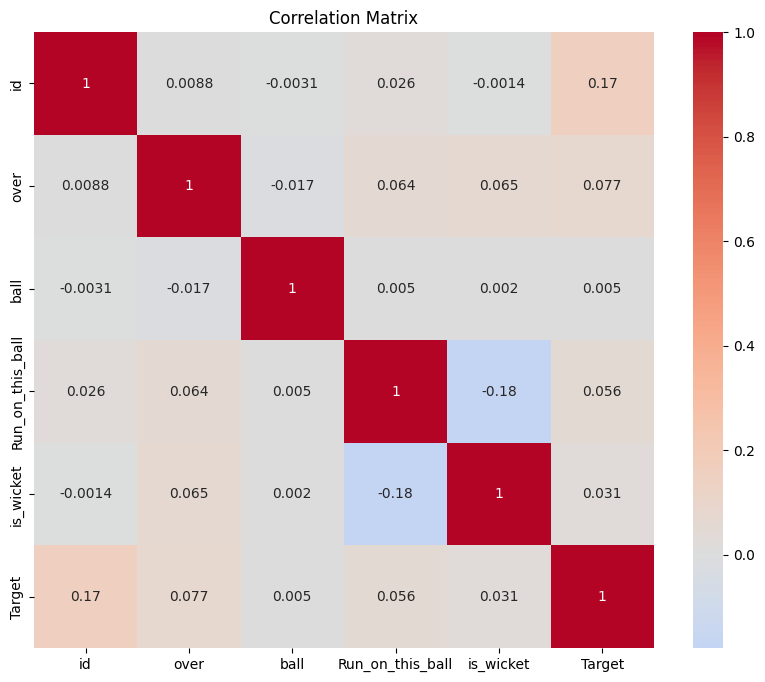

In [197]:
numeric_data = pd.DataFrame(data)

# Display the correlation matrix using Seaborn's heatmap
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Matrix')
plt.show()

checking values which are weakely correlated


In [200]:
correlations = numeric_data.corr()['Target'].abs().sort_values(ascending=False)
print(correlations)

Target              1.000000
id                  0.165853
over                0.076744
Run_on_this_ball    0.055570
is_wicket           0.030662
ball                0.004972
Name: Target, dtype: float64


<ipython-input-200-58102e63bbf2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = numeric_data.corr()['Target'].abs().sort_values(ascending=False)


**Method 2 - RANDOM FOREST REGRESSOR**

In [207]:
feature_columns = [ 'over','ball','Run_on_this_ball', 'is_wicket']

In [209]:
from sklearn.ensemble import RandomForestRegressor
feature_columns = [ 'over','ball','Run_on_this_ball', 'is_wicket']
# Prepare your features (X) and target (y)
X = numeric_data[feature_columns]  # Replace with your actual feature columns
y = numeric_data['Target']     # Assuming 'total_runs' is your target variable

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Feature importances
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)


over                0.443208
ball                0.267399
Run_on_this_ball    0.232233
is_wicket           0.057160
dtype: float64


In [213]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

feature_columns = [ 'over','ball','Run_on_this_ball', 'is_wicket']
# Prepare your features (X) and target (y)
X = numeric_data[feature_columns]  # Replace with your actual feature columns
y = numeric_data['Target']     # 'total_runs' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the performance metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Feature importances
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importance)


RMSE: 28.910765730604712
over                0.453880
ball                0.276309
Run_on_this_ball    0.216868
is_wicket           0.052944
dtype: float64


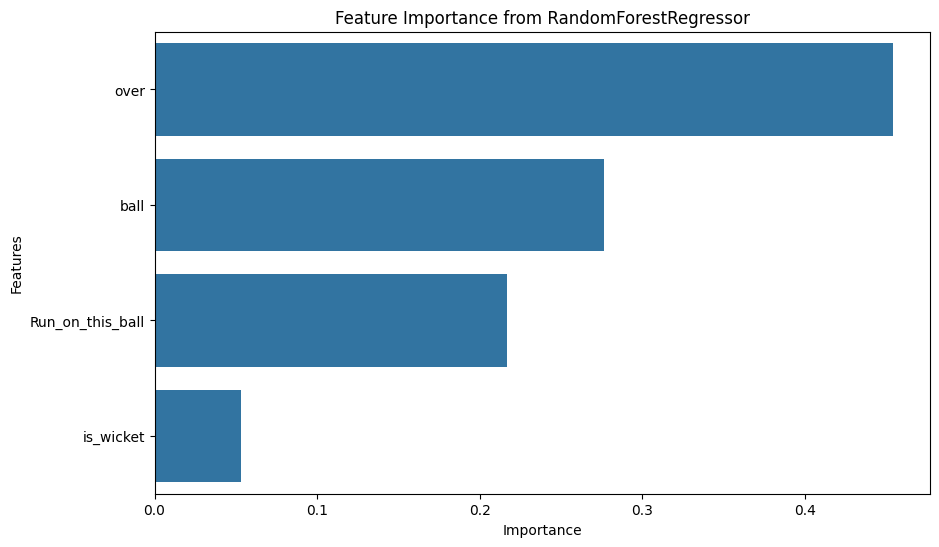

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_importance' is the Series you obtained from the RandomForestRegressor
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForestRegressor')
plt.show()


**Method 3 - F TEST Feature**

In [ ]:

from sklearn.feature_selection import f_regression, SelectKBest

# Select the top k features based on F-test
selector = SelectKBest(f_regression, k='all')
X_new = selector.fit_transform(X, y)

# Get selected features and their scores
selected_features = X.columns[selector.get_support()]
scores = selector.scores_
print(pd.DataFrame({'Feature': selected_features, 'Score': scores}).sort_values(by='Score', ascending=False))

        Feature        Score
5     is_wicket  6486.738649
0          over  1487.317287
1    extra_runs   972.101984
2  non_boundary    74.249692
4        inning    10.803104
3          ball     8.666523


In [ ]:
merged_data.corr()

<ipython-input-37-a2394dd8c275>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.corr()


,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
id,1.000000,0.000300,0.007874,-0.001956,0.028446,-0.018331,0.024763,0.000249,-0.002822
inning,0.000300,1.000000,-0.046512,-0.003879,-0.007301,-0.000545,-0.007472,0.001463,-0.000998
over,0.007874,-0.046512,1.000000,-0.006877,0.086966,-0.001303,0.087345,-0.001185,0.073788
ball,-0.001956,-0.003879,-0.006877,1.000000,0.007168,-0.002487,0.006693,-0.002156,0.004573
batsman_runs,0.028446,-0.007301,0.086966,0.007168,1.000000,-0.140883,0.977587,0.019815,-0.170038
extra_runs,-0.018331,-0.000545,-0.001303,-0.002487,-0.140883,1.000000,0.070707,-0.001777,-0.041352
total_runs,0.024763,-0.007472,0.087345,0.006693,0.977587,0.070707,1.000000,0.019587,-0.180115
non_boundary,0.000249,0.001463,-0.001185,-0.002156,0.019815,-0.001777,0.019587,1.000000,-0.002066
is_wicket,-0.002822,-0.000998,0.073788,0.004573,-0.170038,-0.041352,-0.180115,-0.002066,1.000000


In [205]:
from sklearn.model_selection import train_test_split

X = data[
    [
    'inning', 'over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary',
    'is_wicket',
    ]
]

y = data["batsman_runs"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)


KeyError: "['inning', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary'] not in index"

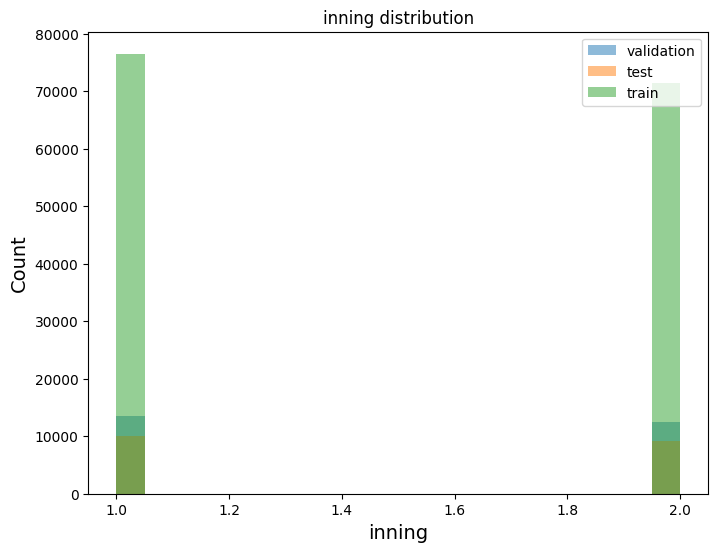

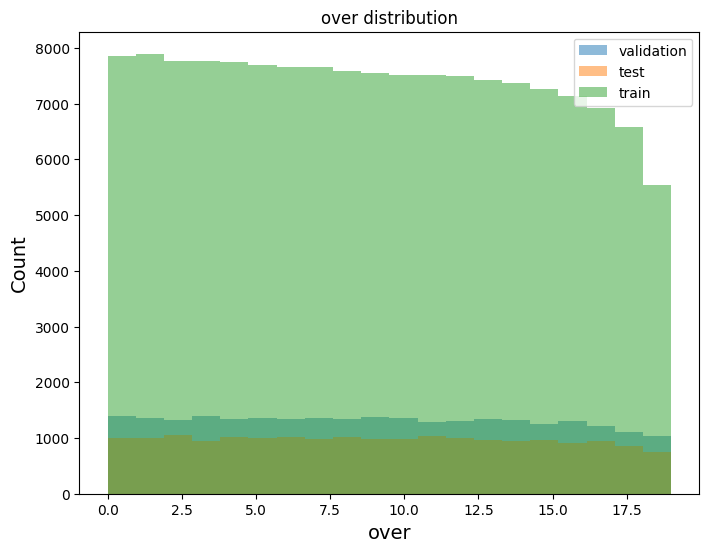

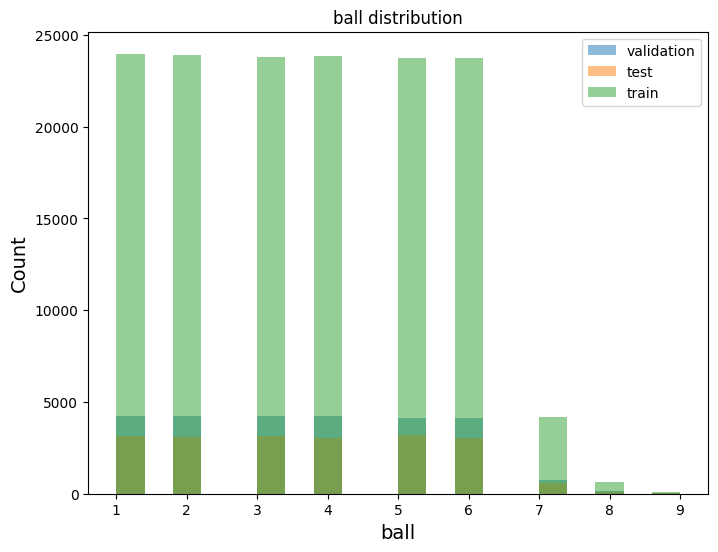

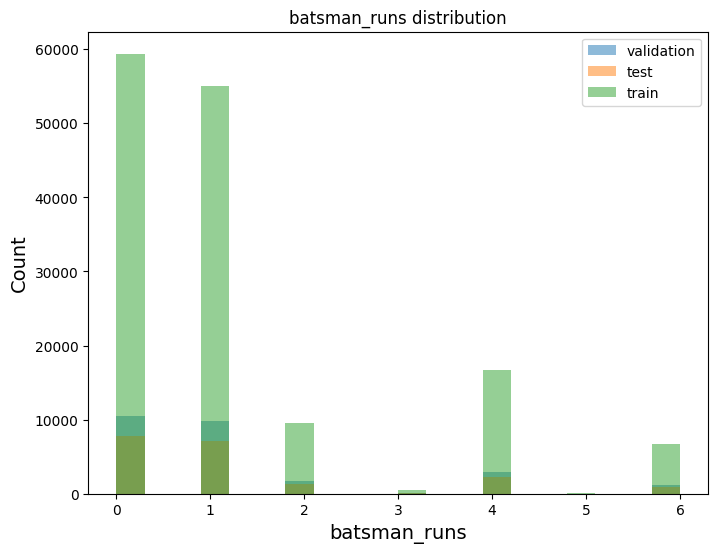

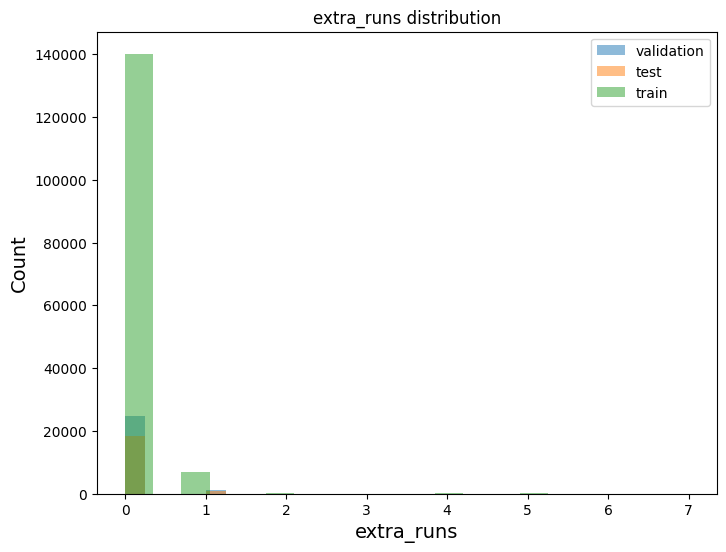

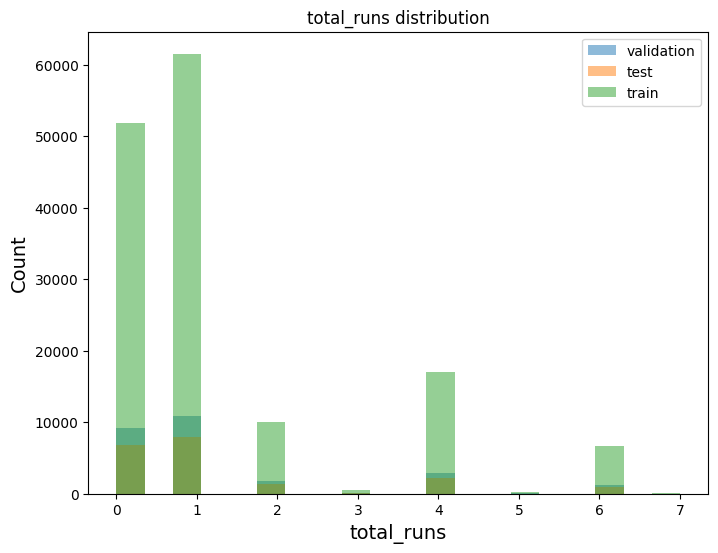

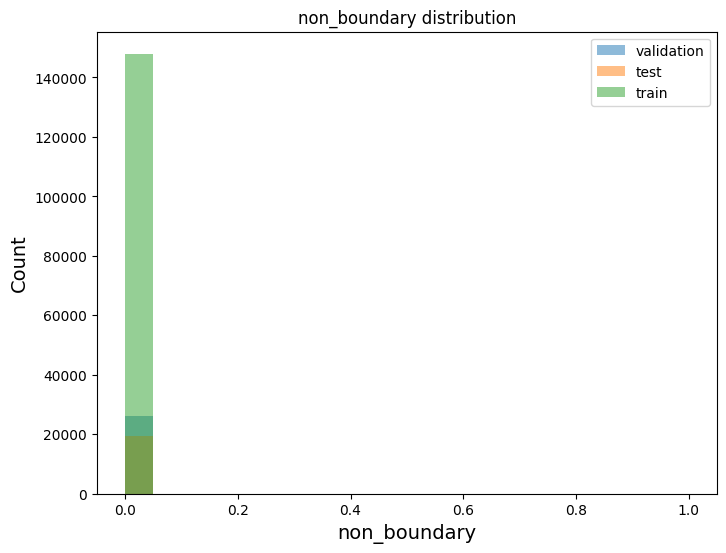

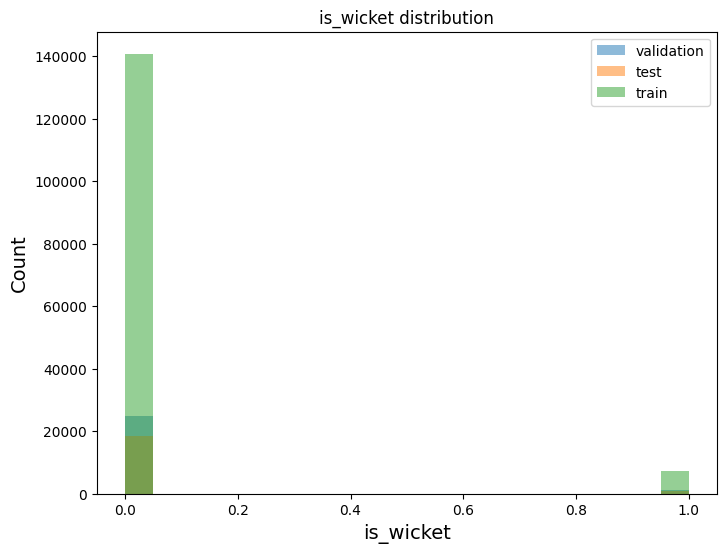

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    ['inning', 'over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary',
    'is_wicket',
    ]
]

X_val_plot = X_val[
    [
        'inning', 'over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary',
    'is_wicket',
    ]
]

X_train_plot = X_train[
    [
       'inning', 'over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary',
    'is_wicket',
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

In [ ]:

import statsmodels.api as sm

targets = ['total_runs']
features = [
    'over', 'extra_runs', 'non_boundary', 'ball', 'inning', 'is_wicket'
]

for target in targets:
    model = sm.OLS(merged_data[target], merged_data[features]).fit()
    print(f"Model Summary for {target}:")
    print(model.summary())
    print("\n\n")


Model Summary for total_runs:
                                 OLS Regression Results                                
Dep. Variable:             total_runs   R-squared (uncentered):                   0.413
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                          2.265e+04
Date:                Mon, 29 Jan 2024   Prob (F-statistic):                        0.00
Time:                        22:17:58   Log-Likelihood:                     -3.6332e+05
No. Observations:              193468   AIC:                                  7.267e+05
Df Residuals:                  193462   BIC:                                  7.267e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------

# Q5.Which independent variables have missing data? How much?

None



In [ ]:
# List of columns to check for missing values
columns_to_check = ['over', 'extra_runs', 'non_boundary', 'ball', 'inning', 'is_wicket']

# Loop through the columns and print missing value counts
for column in columns_to_check:
    missing_count = merged_data[column].isnull().sum()
    print(f"Missing values in '{column}': {missing_count}")


Missing values in 'over': 0
Missing values in 'extra_runs': 0
Missing values in 'non_boundary': 0
Missing values in 'ball': 0
Missing values in 'inning': 0
Missing values in 'is_wicket': 0



# Q6. Do the training and test sets have the same data?


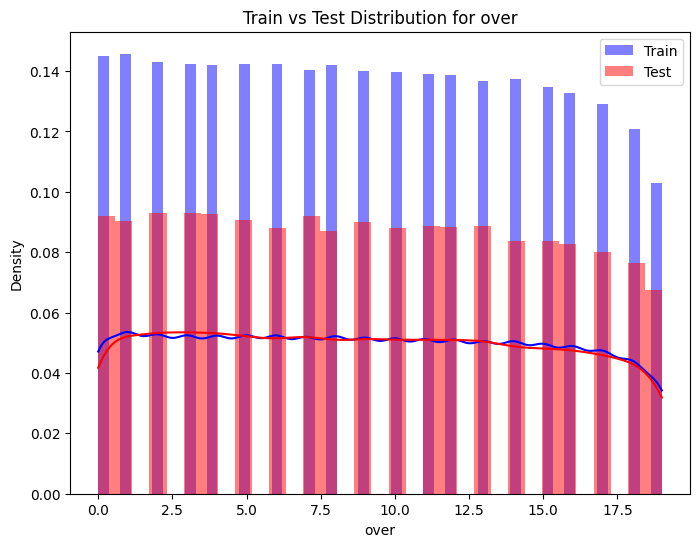

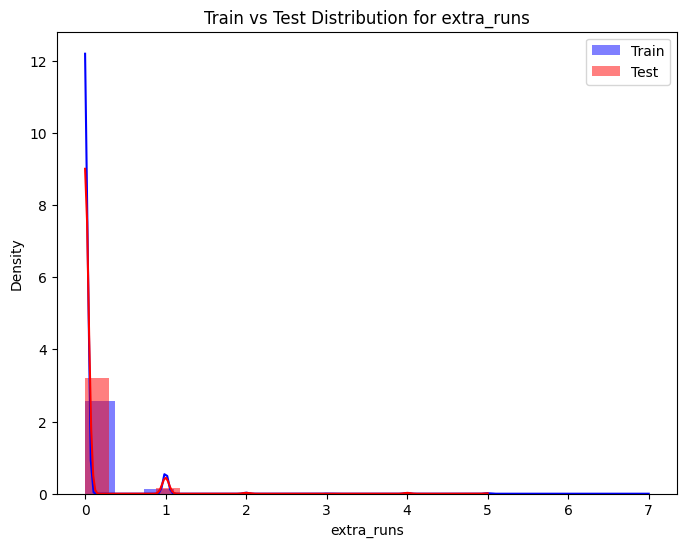

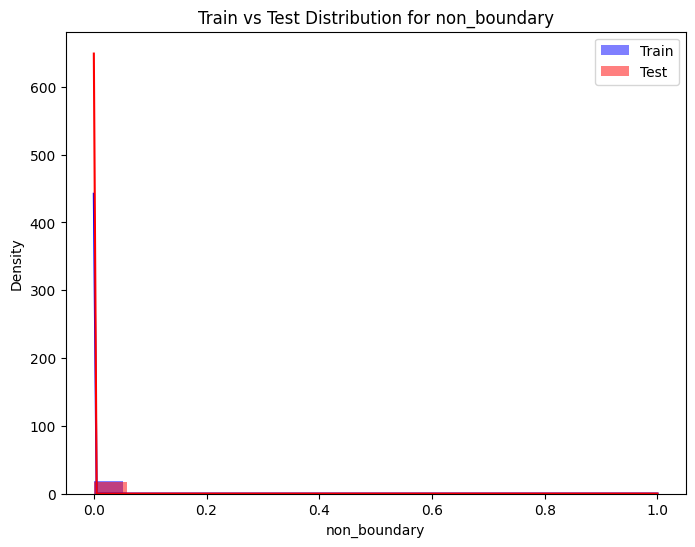

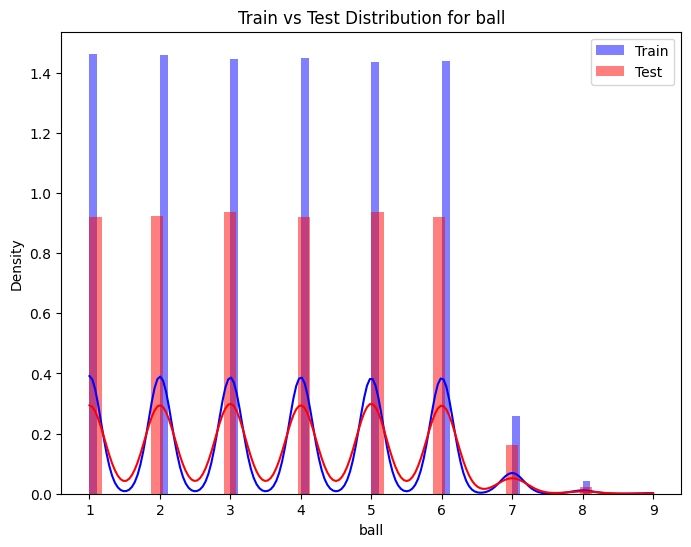

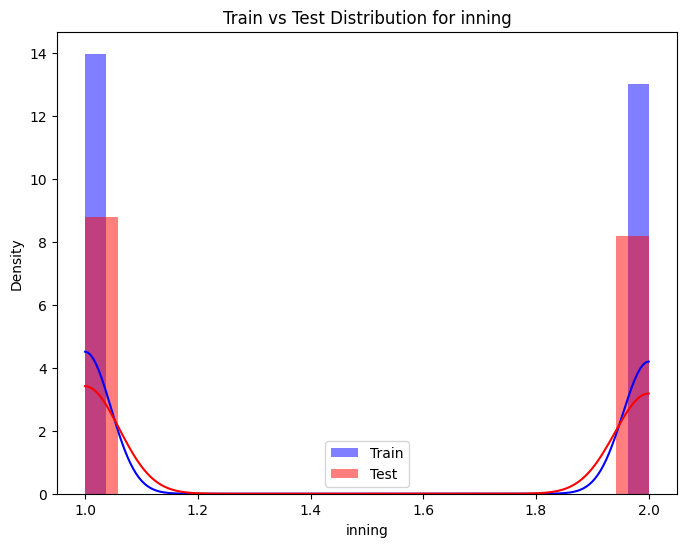

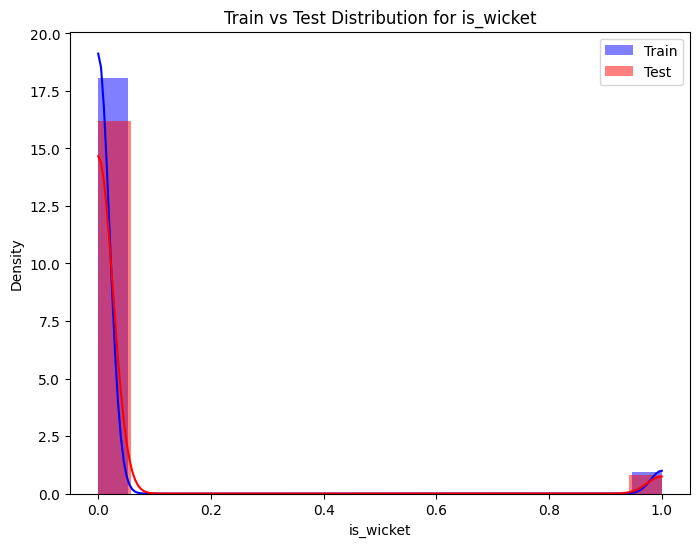

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_visualize = ['over', 'extra_runs', 'non_boundary', 'ball', 'inning', 'is_wicket']

for feature in features_to_visualize:
    plt.figure(figsize=(8,6))

    # Train histogram
    sns.histplot(X_train[feature], color='blue', label='Train', kde=True, stat="density", linewidth=0)

    # Test histogram
    sns.histplot(X_test[feature], color='red', label='Test', kde=True, stat="density", linewidth=0)

    plt.title(f'Train vs Test Distribution for {feature}')
    plt.legend()
    plt.show()


In [ ]:

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)



LinearRegression()

In [ ]:

# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.00
Coefficient of determination: 1.00
R^2 score on tarining set = 1.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_test_overlap = pd.merge(X_train.assign(InTrain=1), X_test.assign(InTrain=0), on=list(X.columns), how='inner')

print(train_test_overlap)


          over  extra_runs  non_boundary  ball  inning  is_wicket  InTrain_x  \
0           16           0             0     4       2          0          1   
1           16           0             0     4       2          0          1   
2           16           0             0     4       2          0          1   
3           16           0             0     4       2          0          1   
4           16           0             0     4       2          0          1   
...        ...         ...           ...   ...     ...        ...        ...   
19304443     3           2             0     2       2          0          1   
19304444     2           4             0     7       1          0          1   
19304445     2           4             0     7       1          0          1   
19304446     2           4             0     4       1          0          1   
19304447     2           4             0     4       1          0          1   

          InTrain_y  
0                

# Q7. Is the predictor variables independent of all the other predictor variables?


* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

<ipython-input-81-7507905abf94>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


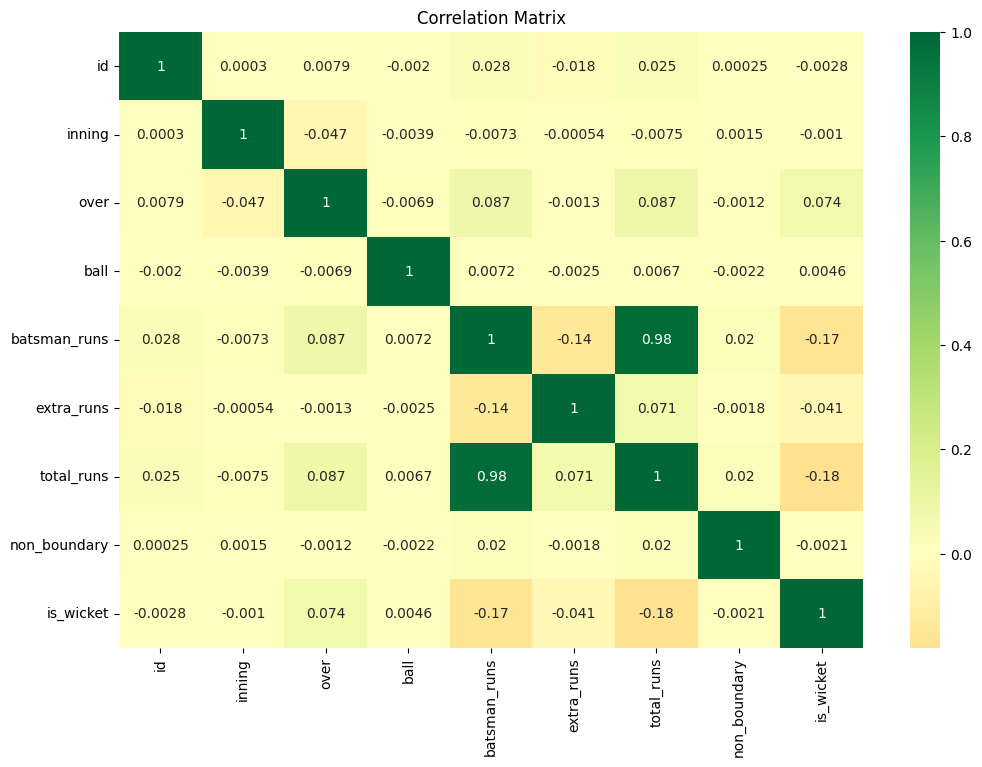

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
X = merged_data
# Assuming 'X' is your DataFrame of predictor variables
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", center=0)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-176-239a5902b71a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

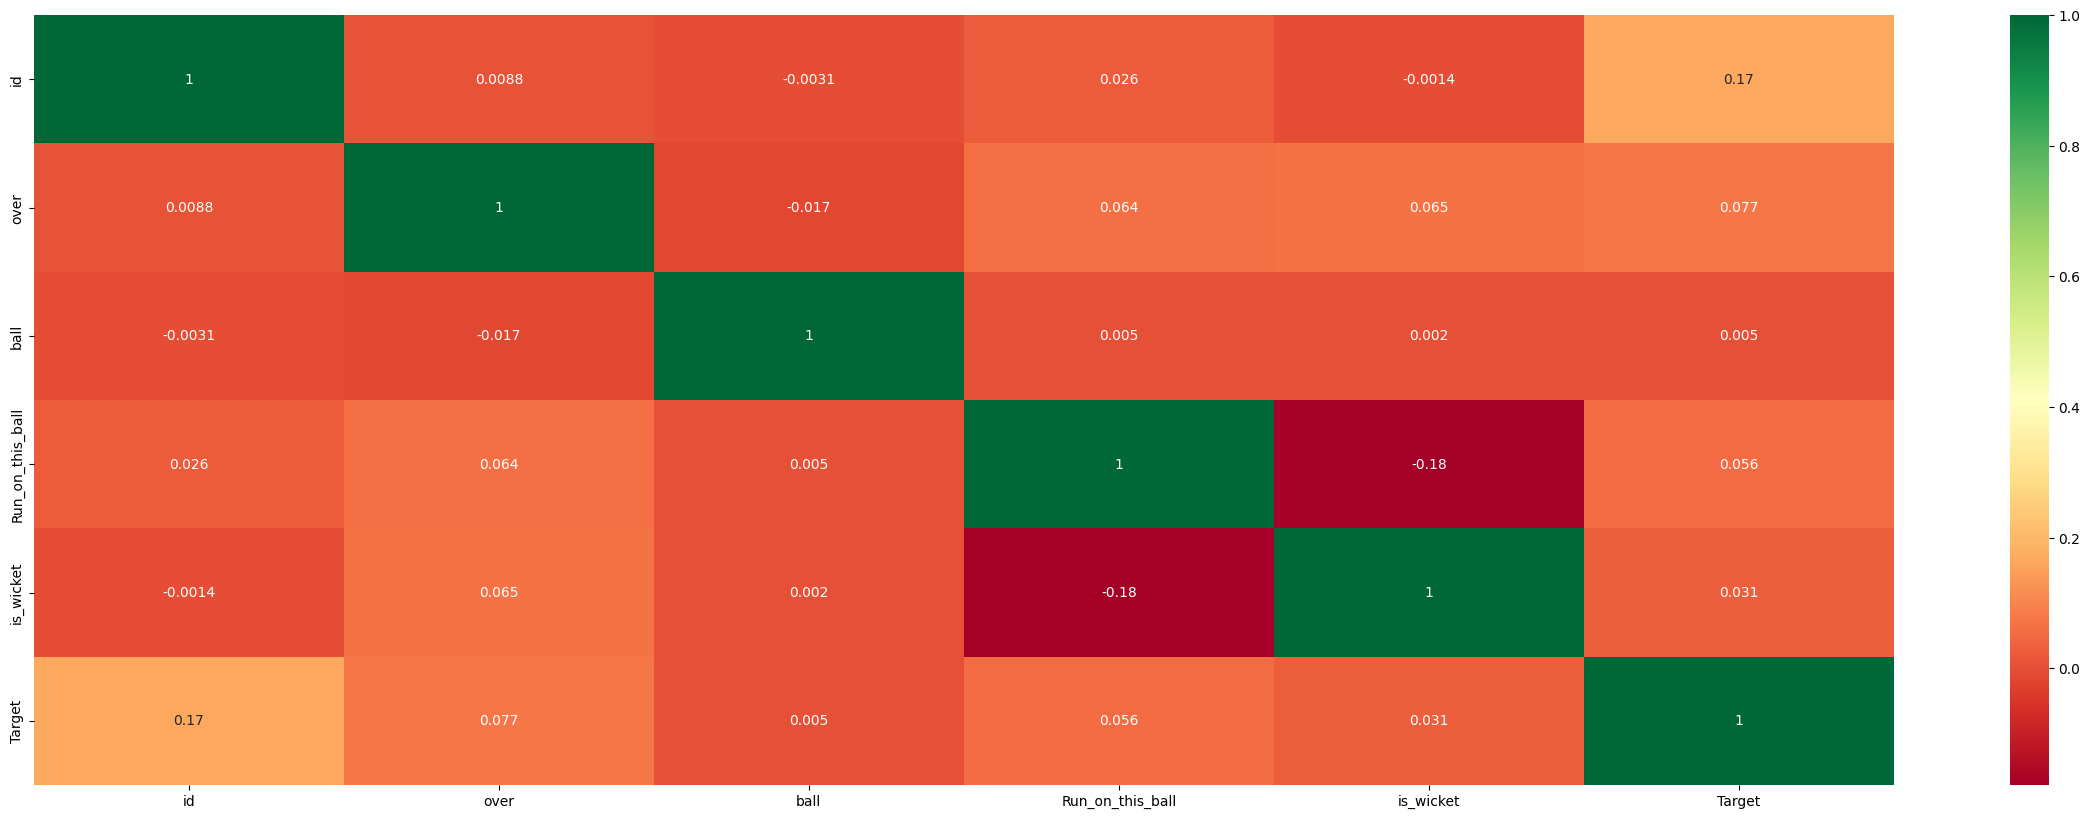

In [176]:
plt.figure(figsize=(30, 10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap="RdYlGn")

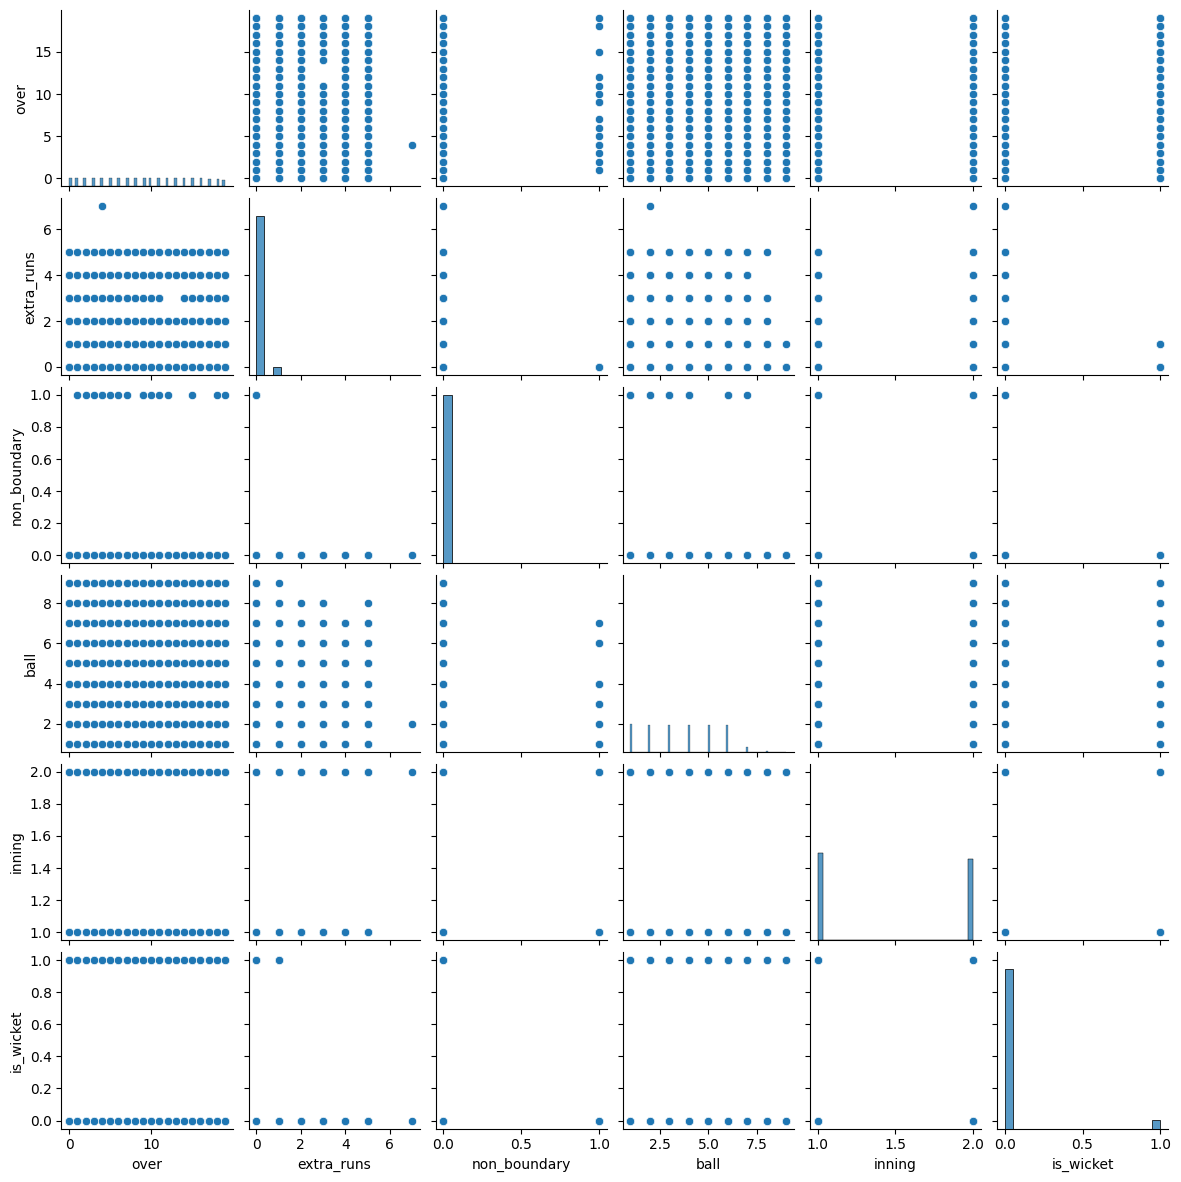

In [ ]:
# Use for a small subset of variables
sns.pairplot(X[features_to_visualize],height=2, aspect=1)
plt.show()


`batsman_runs` and `total_runs` have a very high correlation (0.98), which is expected as batsman_runs are a component of total_runs.

This suggests that batsman_runs is not independent of total_runs.

# Q8 Which predictor variables are the most important?
* batsman_runs

# Q9. Do the ranges of the predictor variables make sense?
* Yes as expected the batsman_runs are a component of total_runs.


# Q10. What are the distributions of the predictor variables?

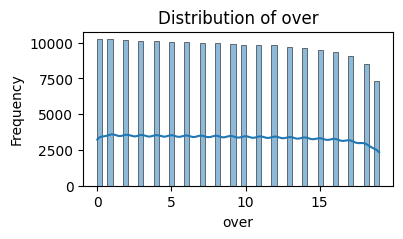

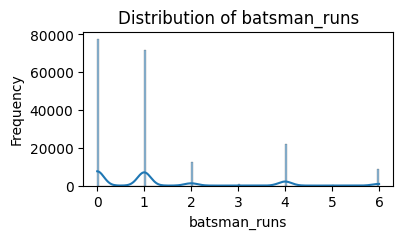

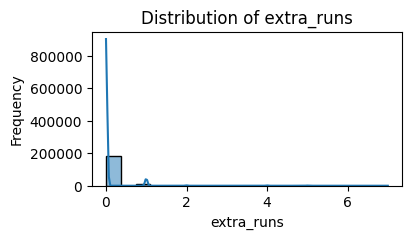

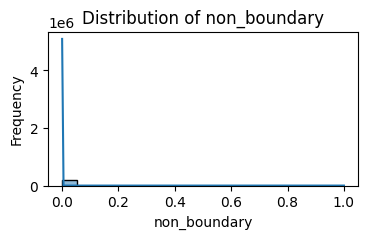

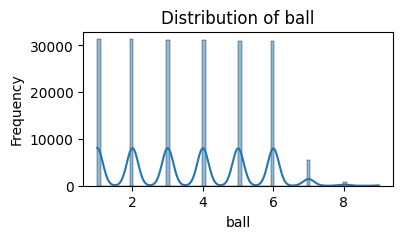

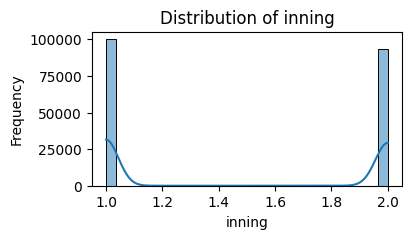

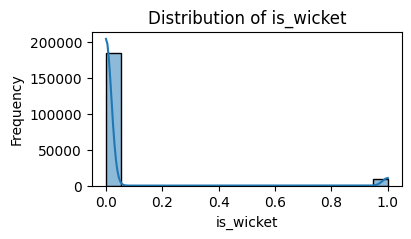

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

predictor_columns = ['over', 'batsman_runs', 'extra_runs', 'non_boundary', 'ball', 'inning', 'is_wicket']

# Plotting Histograms
for column in predictor_columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(merged_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix

In [ ]:

# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.8891 ± 0.0097,batsman_runs
0.2182 ± 0.0021,total_runs
0.0084 ± 0.0000,extra_runs
0 ± 0.0000,is_wicket
0 ± 0.0000,non_boundary
0 ± 0.0000,ball
0 ± 0.0000,over
0 ± 0.0000,inning
